Data cleaning and preprocessing.

Steps
- Load Dataset/ Dataset Overview.

- Check missing Values.
   - Drop down rows, fill with mean/median/mode.

 - Detect outliers in numeric columns

 - Encode  Categorical Features  
    - Use Label Encoding for ordinal categories.
    - Use One - Hot Encoding for norminal features.

- Visual Inspections
  - use Heatmaps, Barcharts/Histograms to visualize missing patterns.


Load Datasets / Datasets Overview

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy as sp

# Load datasets.
file_path = "Datasets/laptop_price.csv"
data = pd.read_csv(file_path, encoding="latin1")
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [9]:
# Display the first 10 Rows of dataset.
data.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [10]:
# Display the core datasets column, datatypes and memory alloations.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
# Display 10 random rows.
data.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
434,441,Lenovo,Thinkpad P51,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,512GB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,2449.0
71,73,Dell,Inspiron 5370,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,955.0
650,658,Asus,ROG G701VI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.8kg,2799.0
1179,1197,HP,ProBook 450,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.07kg,650.0
575,582,Mediacom,SmartBook 141,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4GB,32GB SSD,Intel HD Graphics,Windows 10,1.4kg,249.0
700,708,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,819.0
102,105,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 520,Linux,2.2kg,647.0
61,62,Dell,Vostro 5471,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.7kg,879.0
172,176,Lenovo,IdeaPad 320-15AST,Notebook,15.6,1366x768,AMD A6-Series 9220 2.9GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,No OS,2.2kg,309.0
426,433,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02kg,1142.4


In [12]:
# Display columns
data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [13]:
# Standardise column names to lowercase and add underscores.
data.columns = data.columns.str.lower().str.replace("-", "")
data.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [14]:
# Correct column abbreviated column names.
data.rename(columns={"cpu": "device_processor (CPU)", "ram": "device_memory (RAM)", "opsys" : "operating_system", "typename": "laptop_type", "memory": "memory_capacity"}, inplace=True)
data.columns

Index(['laptop_id', 'company', 'product', 'laptop_type', 'inches',
       'screenresolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [15]:
# Correct screen resolution column name.
data.rename(columns={"screenresolution": "screen_resolution", "company" : "manufacturers_info"}, inplace=True)
data.columns

Index(['laptop_id', 'manufacturers_info', 'product', 'laptop_type', 'inches',
       'screen_resolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [16]:
# Get column summary statistics
data.describe()

,laptop_id,inches,price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [17]:
# Display summary of categorical columns.
data.describe(include="object")

,manufacturers_info,product,laptop_type,screen_resolution,device_processor (CPU),device_memory (RAM),memory_capacity,gpu,operating_system,weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


CHECK FOR MISSING VALUES.

In [18]:
# Check for missing values.
data.isnull().sum()

laptop_id                 0
manufacturers_info        0
product                   0
laptop_type               0
inches                    0
screen_resolution         0
device_processor (CPU)    0
device_memory (RAM)       0
memory_capacity           0
gpu                       0
operating_system          0
weight                    0
price_euros               0
dtype: int64

In [19]:
# Check for missing values in categorical variables.
missing_Values = data.select_dtypes(include="object").isnull().sum()
missing_Values

manufacturers_info        0
product                   0
laptop_type               0
screen_resolution         0
device_processor (CPU)    0
device_memory (RAM)       0
memory_capacity           0
gpu                       0
operating_system          0
weight                    0
dtype: int64

In [20]:
# Use boolean mask to check for rows with missing values.
data_mask = data.isnull()
rows_with_missing_var = data[data_mask.any(axis=1)]
print(rows_with_missing_var)
print("Report!\nThere are no rows with missing values.")



Empty DataFrame
Columns: [laptop_id, manufacturers_info, product, laptop_type, inches, screen_resolution, device_processor (CPU), device_memory (RAM), memory_capacity, gpu, operating_system, weight, price_euros]
Index: []
Report!
There are no rows with missing values.


In [21]:
# Display of full metadata of rows with missing data.
rows_with_missing_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laptop_id               0 non-null      int64  
 1   manufacturers_info      0 non-null      object 
 2   product                 0 non-null      object 
 3   laptop_type             0 non-null      object 
 4   inches                  0 non-null      float64
 5   screen_resolution       0 non-null      object 
 6   device_processor (CPU)  0 non-null      object 
 7   device_memory (RAM)     0 non-null      object 
 8   memory_capacity         0 non-null      object 
 9   gpu                     0 non-null      object 
 10  operating_system        0 non-null      object 
 11  weight                  0 non-null      object 
 12  price_euros             0 non-null      float64
dtypes: float64(2), int64(1), object(10)
memory usage: 0.0+ bytes


In [22]:
# Inspect missing data in each column to find missing values.
for column in data.select_dtypes(include=["object"]).columns:
    detail = data[column].unique()
    print('\nUnique values in {} are :{}'.format(column, data[column].unique()))
  


Unique values in manufacturers_info are :['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Unique values in product are :['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'G

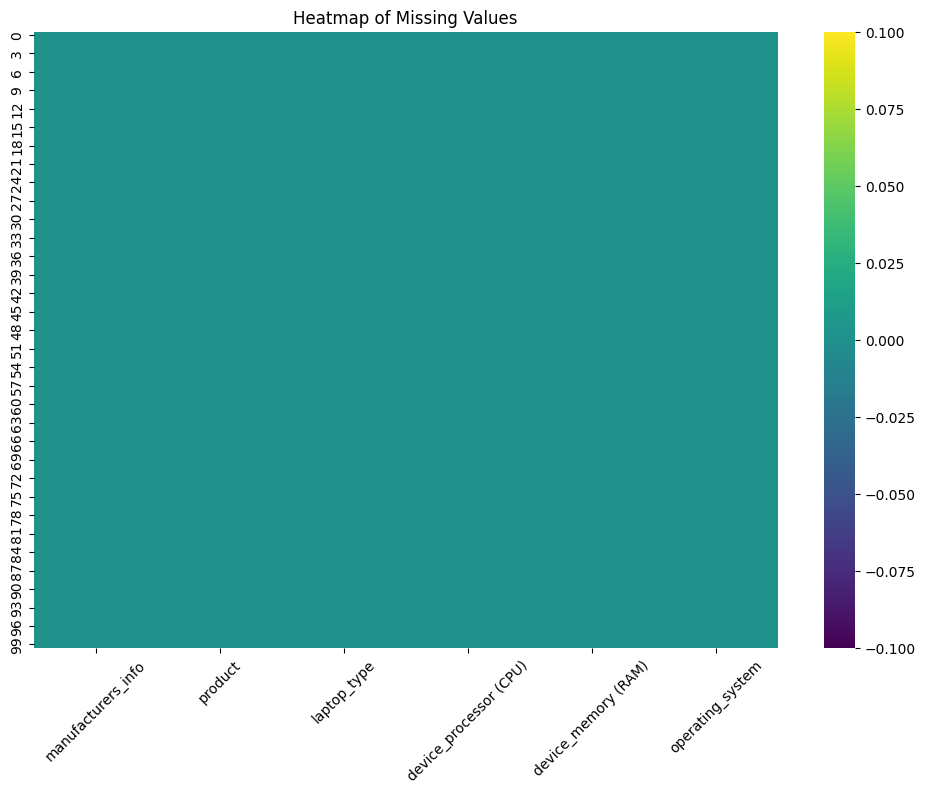

In [23]:
# Visualize inspection of missing data
# Use heatmaps to chek missing values.
plt.figure(figsize=(12, 8))
sns.heatmap(data[["manufacturers_info", "product", "laptop_type", "device_processor (CPU)", "device_memory (RAM)", "operating_system"]][:100].isnull(), cbar=True, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xticks(rotation=45)
plt.show()

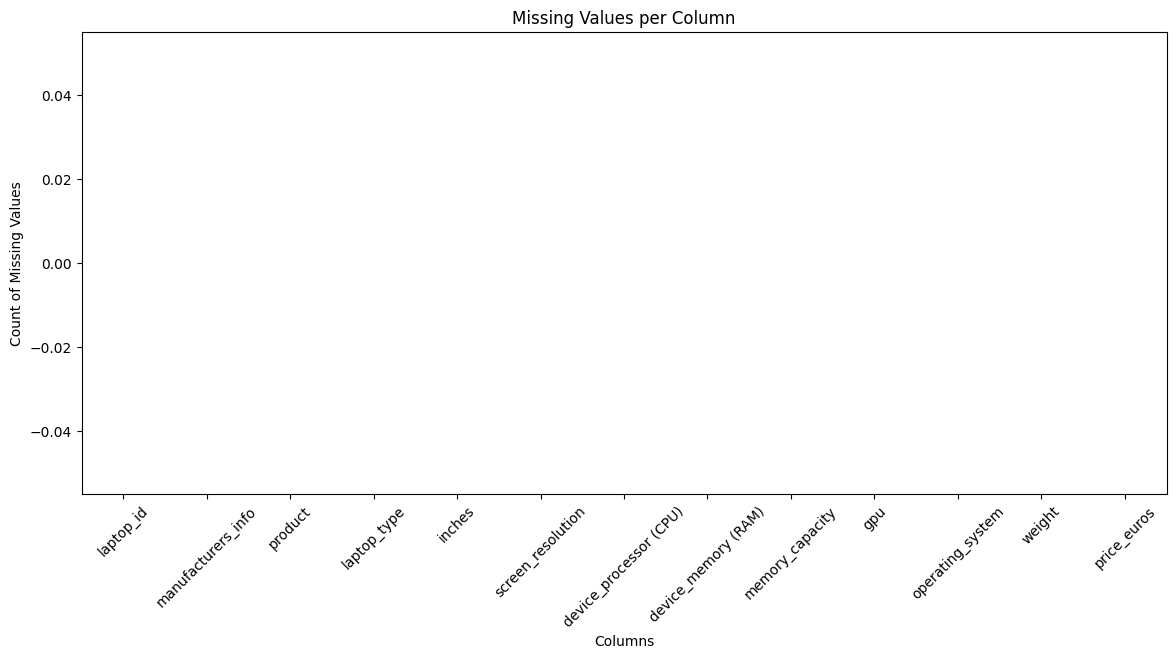

In [24]:
# Bar chart for missing values per column
missing_values = data.isnull().sum()
missing_values.plot(kind="bar", figsize=(14, 6))
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

c:\Users\Scientist\Documents\GitHub\Laptop-Price-Prediction-Model\venv\Lib\site-packages\scipy\cluster\hierarchy.py:2950: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


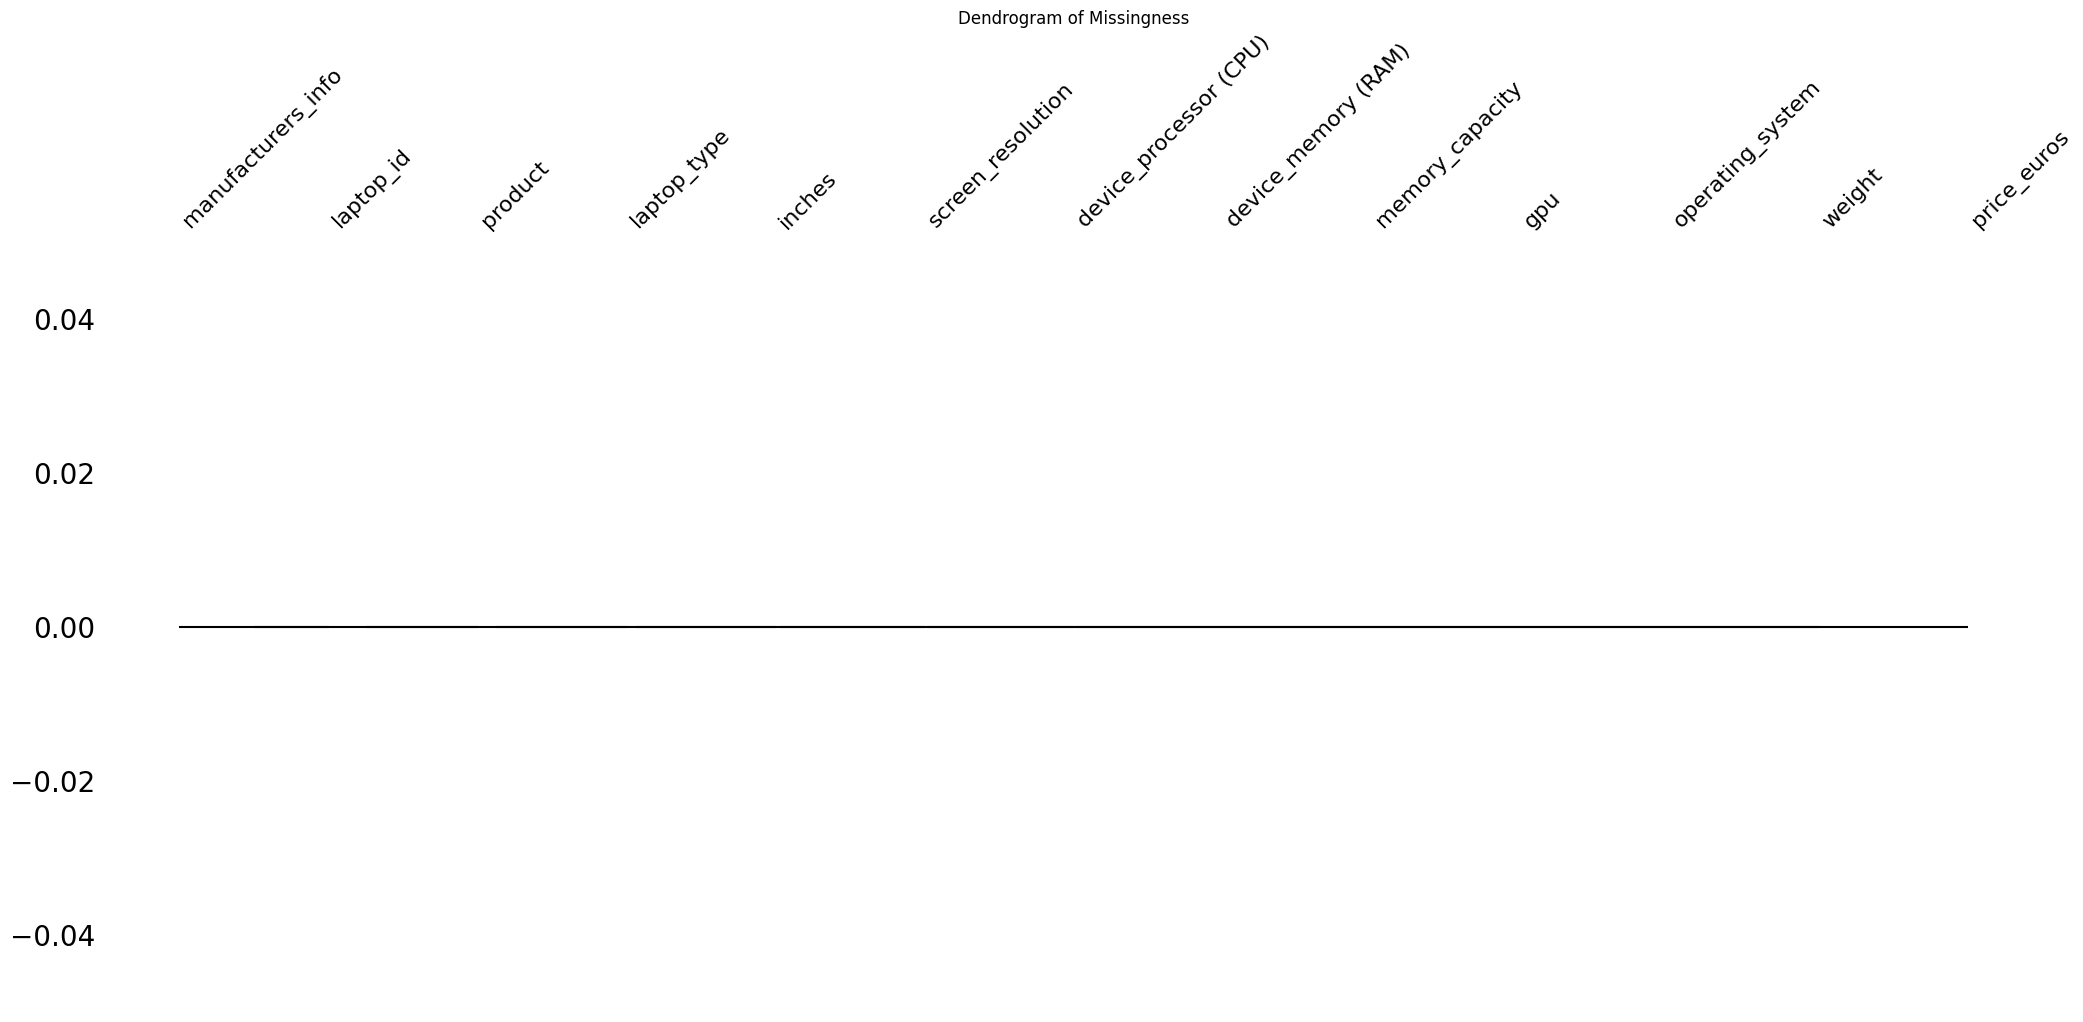

In [25]:
# Detect missing data using MissingNo Dendrogram
msno.dendrogram(data)
plt.title("Dendrogram of Missingness")
plt.show()

DETECT OUTLIERS IN NUMERIC COLUMNS

In [26]:
# Using IQR Method
numeric_col = data.select_dtypes(include=["int64", "float64"]).columns
outliers_iqr = {}
for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    print("Outliers found in {} using IQR are:".format(col))
    print(outliers_iqr[col].head())

Outliers found in laptop_id using IQR are:
Series([], Name: laptop_id, dtype: int64)
Outliers found in inches using IQR are:
20     11.6
50     10.1
177    18.4
314    11.6
319    11.6
Name: inches, dtype: float64
Outliers found in price_euros using IQR are:
17     2858.0
190    2824.0
196    6099.0
204    3055.0
238    3890.0
Name: price_euros, dtype: float64


In [27]:

# Ensure numeric_col is defined
if 'numeric_col' not in locals():
    numeric_col = data.select_dtypes(include=["int64", "float64"]).columns

# Using Z-Score Method.
statistics = sp.stats
outliers_score = {}
for col in numeric_col:
    z_scores = statistics.zscore(data[col].dropna())
    abs_z_scores = np.abs(z_scores)
    outliers = data[col][abs_z_scores > 3]
    outliers_score[col] = outliers
    print("Outliers found in {} using z-score are:".format(col))
    print(outliers.head())




Outliers found in laptop_id using z-score are:
Series([], Name: laptop_id, dtype: int64)
Outliers found in inches using z-score are:
50      10.1
1082    10.1
1114    10.1
1126    10.1
Name: inches, dtype: float64
Outliers found in price_euros using z-score are:
196    6099.0
238    3890.0
610    4899.0
723    3659.4
744    3299.0
Name: price_euros, dtype: float64


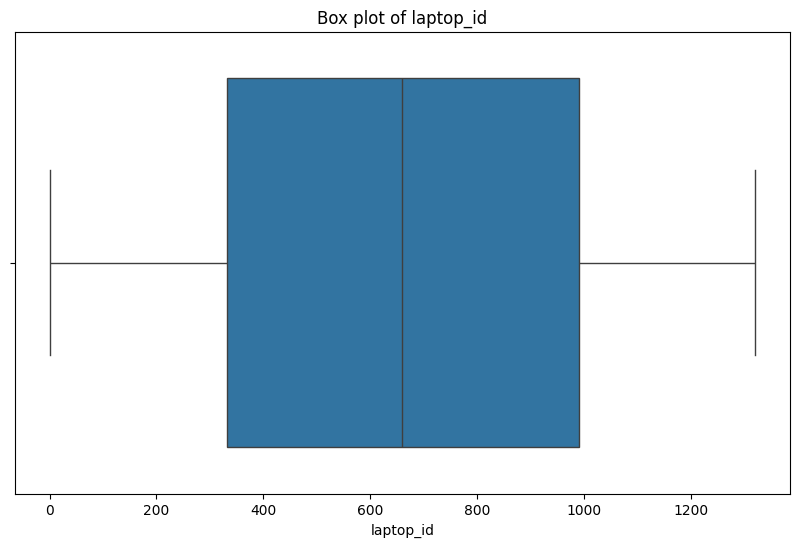

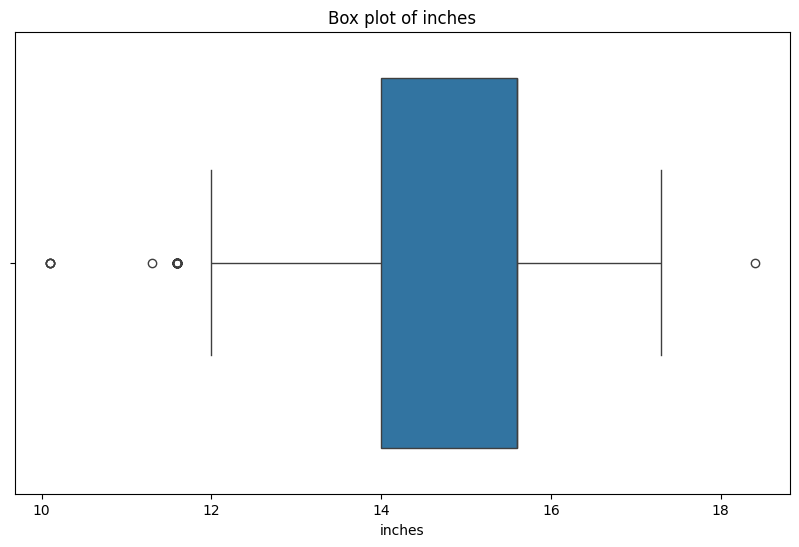

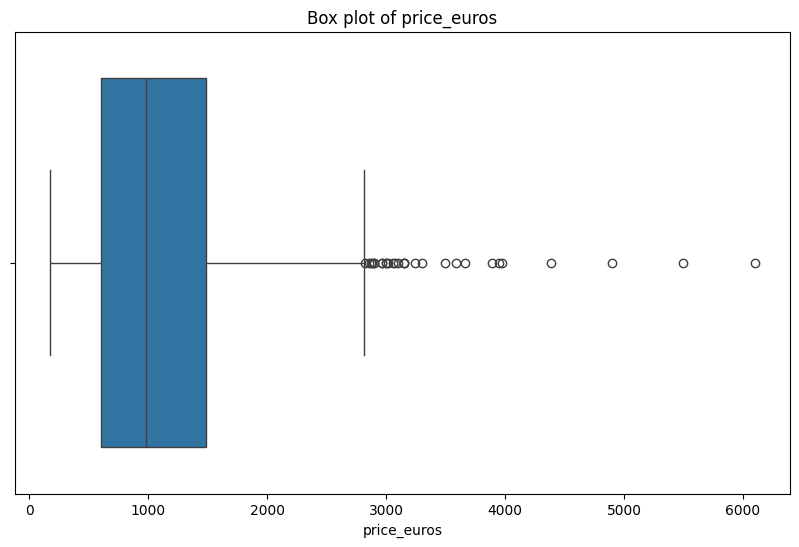

In [28]:
# Box plots for outlier visualization.
for col in numeric_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title("Box plot of {}".format(col))
    plt.show()


laptop_id         Axes(0.125,0.53;0.168478x0.35)
inches         Axes(0.327174,0.53;0.168478x0.35)
price_euros    Axes(0.529348,0.53;0.168478x0.35)
dtype: object

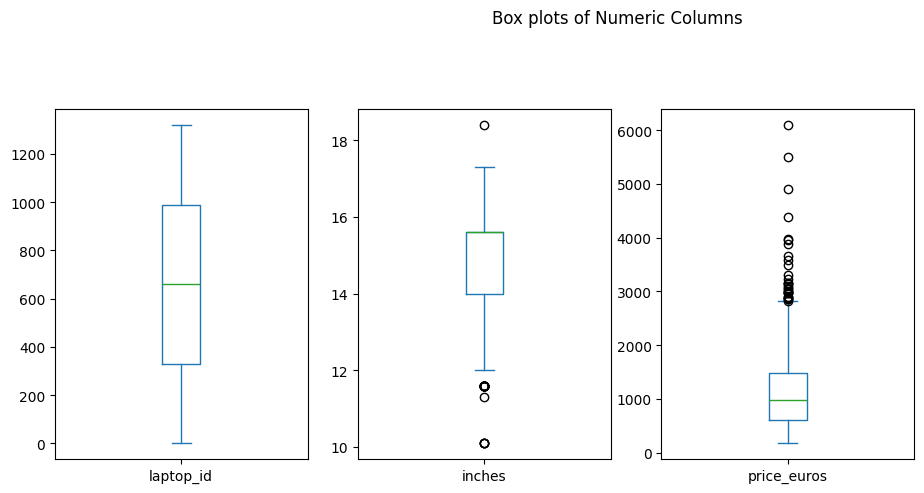

In [29]:
# Boxplots to display outliers using quartiles.
data[numeric_col].plot(kind="box", subplots=True, layout=(2, 4), figsize=(15, 10), title="Box plots of Numeric Columns")


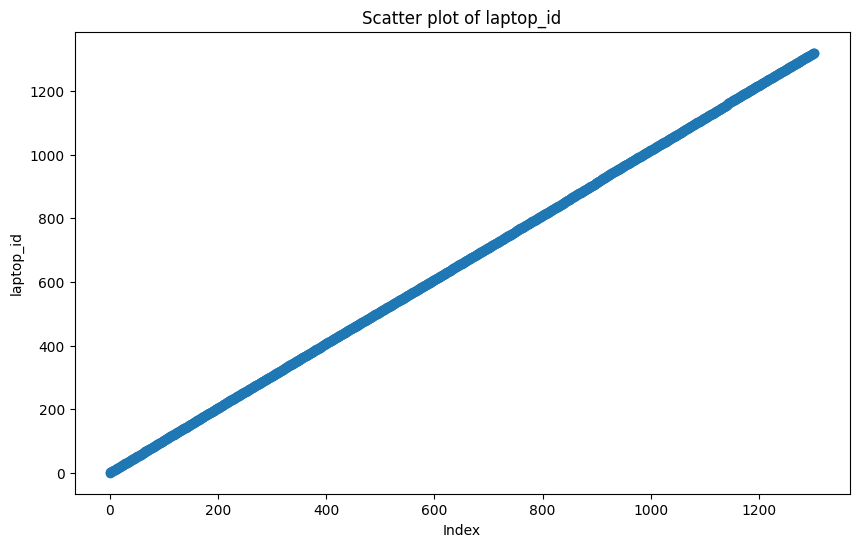

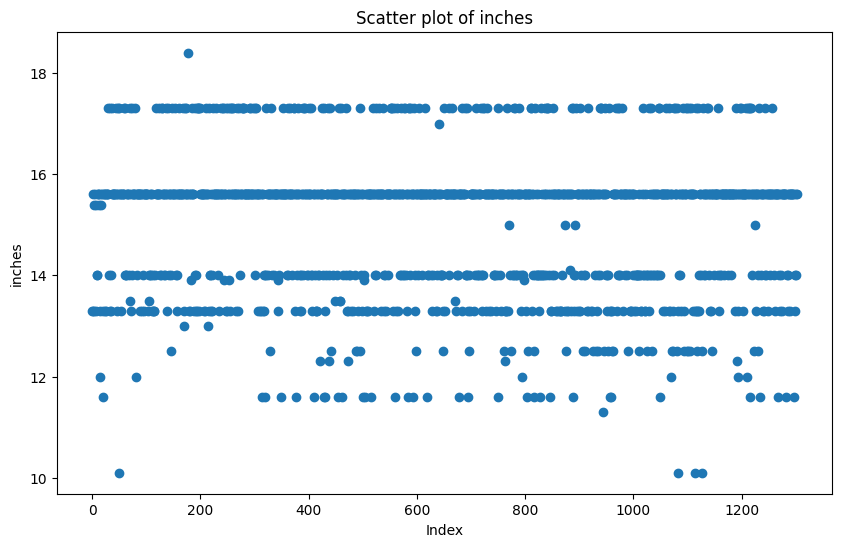

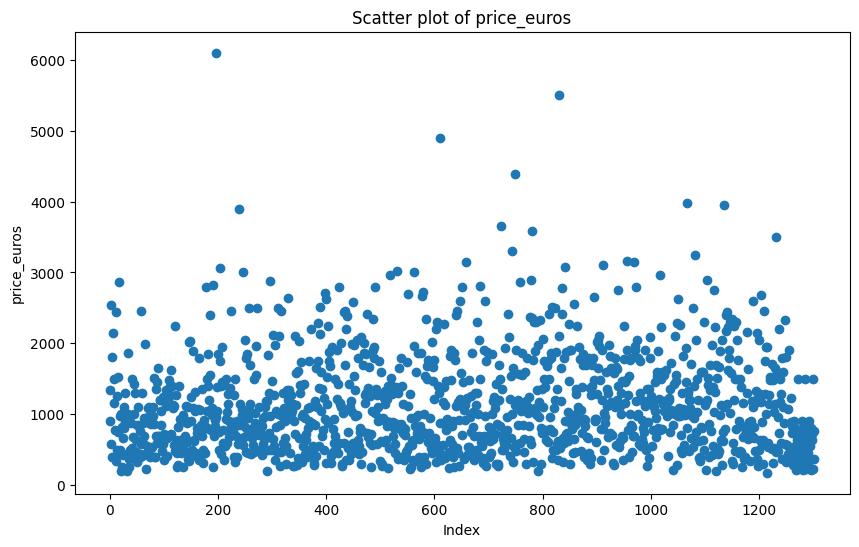

In [30]:
# Scatter plots Displaying Outliers.
for col in numeric_col:
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[col])
    plt.title("Scatter plot of {}".format(col))
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

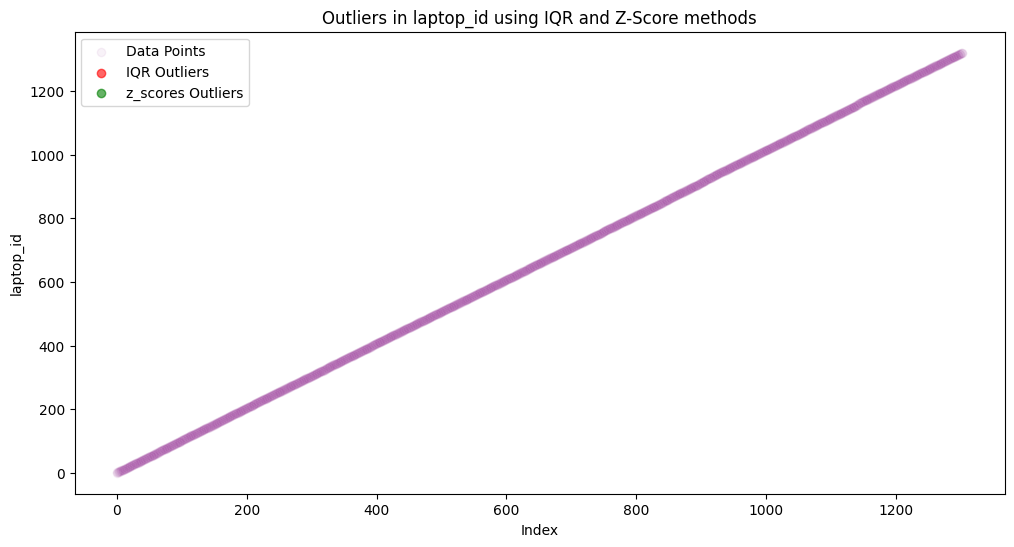

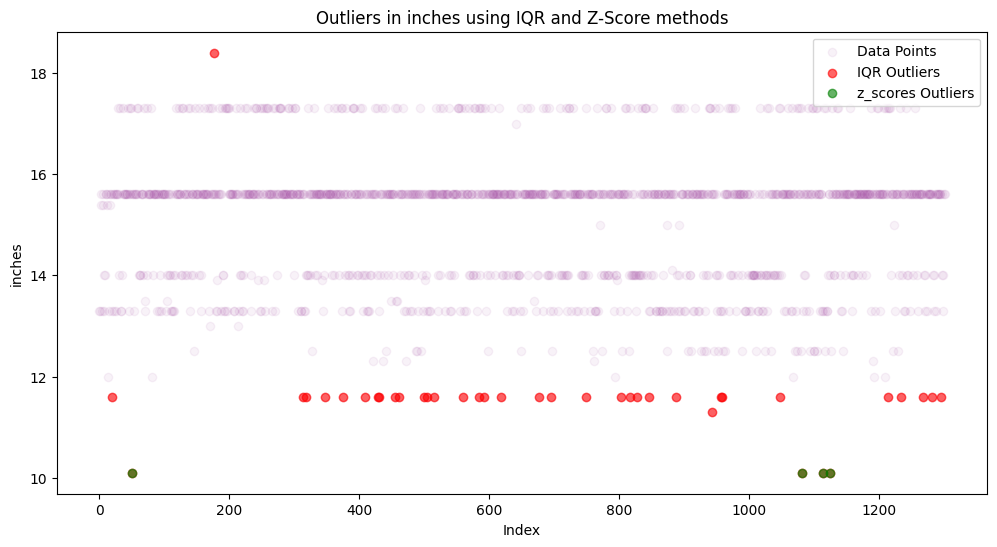

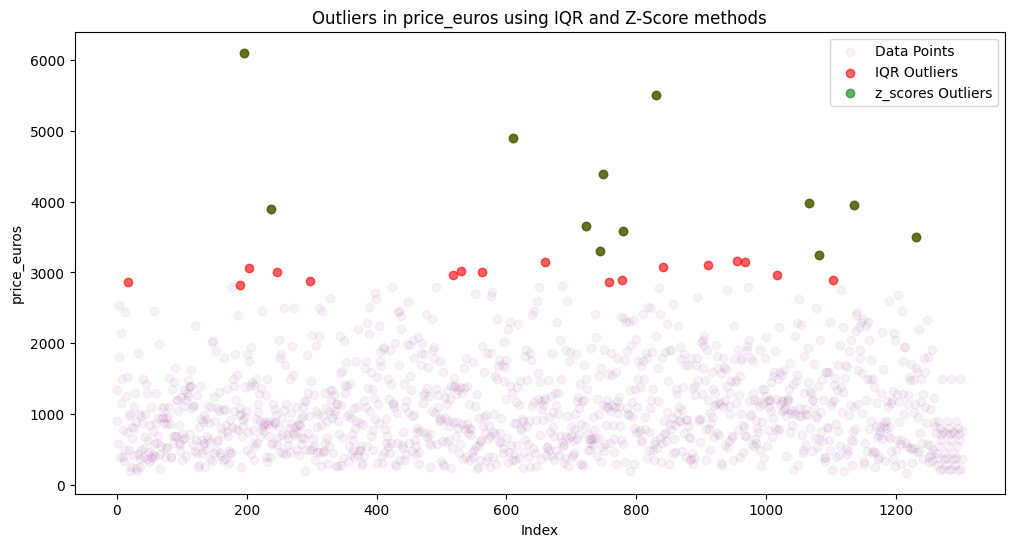

In [31]:
# Display relationship between numeric of outliers of z-score and IQR methods.
for col in numeric_col:
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data[col], label= "Data Points", color="purple", alpha=0.05)
    plt.scatter(outliers_iqr[col].index, outliers_iqr[col], label="IQR Outliers", color="red", alpha=0.6)
    plt.scatter(outliers_score[col].index, outliers_score[col], label="z_scores Outliers", color="green", alpha=0.6)
    plt.title("Outliers in {} using IQR and Z-Score methods".format(col))
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()


 - Encode  Categorical Features  
    - Use Label Encoding for ordinal categories.
    - Use One - Hot Encoding for norminal features.

In [32]:
# Use of Label Encoding to convert categorical variabls.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    data[col].head()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laptop_id               1303 non-null   int64  
 1   manufacturers_info      1303 non-null   int64  
 2   product                 1303 non-null   int64  
 3   laptop_type             1303 non-null   int64  
 4   inches                  1303 non-null   float64
 5   screen_resolution       1303 non-null   int64  
 6   device_processor (CPU)  1303 non-null   int64  
 7   device_memory (RAM)     1303 non-null   int64  
 8   memory_capacity         1303 non-null   int64  
 9   gpu                     1303 non-null   int64  
 10  operating_system        1303 non-null   int64  
 11  weight                  1303 non-null   int64  
 12  price_euros             1303 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 132.5 KB


In [34]:
# use one hot encoding to convert categorical variables.
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laptop_id               1303 non-null   int64  
 1   manufacturers_info      1303 non-null   int64  
 2   product                 1303 non-null   int64  
 3   laptop_type             1303 non-null   int64  
 4   inches                  1303 non-null   float64
 5   screen_resolution       1303 non-null   int64  
 6   device_processor (CPU)  1303 non-null   int64  
 7   device_memory (RAM)     1303 non-null   int64  
 8   memory_capacity         1303 non-null   int64  
 9   gpu                     1303 non-null   int64  
 10  operating_system        1303 non-null   int64  
 11  weight                  1303 non-null   int64  
 12  price_euros             1303 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 132.5 KB


In [35]:
# Save Final Cleaned Data sets
data.to_csv("Datasets/cleaned_laptop_price_data.csv", index=False, encoding="utf-8")

**SUMMARY OF ENCODING STEPS**
- The dataset contains categorical variables such as Manufactures_info (Company), operating_System, screen_resolution. etc.

**Label Encoding**
  This was applied to ordinal features where categories had inherent order. If it was detected, it encoded it into integers.

  **ONE HOT ENCODING**
    This was used for norminal features (e.g Manufacturers_info(company), operating_system, screen_resolution) to avoid imposing artificial order. This expanded each category into binary indicator columns.

After encoding, the dataset was entirely numeric, making it suitable for training the model.    